## Hakai Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pytz
import pickle
import cmocean

mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
PATH= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}
rematch=False
if rematch==True:
    df1=et.loadHakai()
    df1.head()

In [3]:
if rematch==True:
    data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
    pickle.dump(data,open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataHakai.pkl','wb'))
else:
    data=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataHakai.pkl','rb'))

In [4]:
data.keys()

Index(['NO2+NO3 (uM)', 'PO4', 'SiO2', 'dtUTC', 'Station', 'Lat', 'Lon', 'Z',
       'SA', 'CT', 'pZ', 'j', 'i', 'mod_nitrate', 'mod_silicon',
       'mod_ammonium', 'mod_diatoms', 'mod_ciliates', 'mod_flagellates',
       'mod_vosaline', 'mod_votemper'],
      dtype='object')

In [14]:
isummer15=(data.dtUTC>dt.datetime(2015,5,15))&(data.dtUTC<dt.datetime(2015,8,20))
isummer16=(data.dtUTC>dt.datetime(2016,5,15))&(data.dtUTC<dt.datetime(2016,8,20))
isummer17=(data.dtUTC>dt.datetime(2017,5,15))&(data.dtUTC<dt.datetime(2017,8,20))
isurf=data.Z<=6
data2=data.loc[(isummer15|isummer16|isummer17)&isurf]

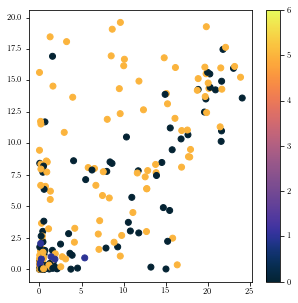

In [15]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
p=et.varvarScatter(ax,data2,'NO2+NO3 (uM)','mod_nitrate','Z',vmin=0,vmax=6)
fig.colorbar(p)

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


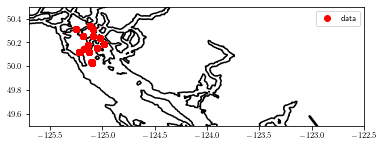

In [18]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data2['Lon'], data2['Lat'], 'ro',label='data')
#ax.plot(data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lon']], 
#        data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lat']], 
#        'bo', label = 'Juan de Fuca')

#ax.plot(data.loc[data.Si>75,['Lon']],data.loc[data.Si>75,['Lat']],'*',color='y',label='high Si')
#ax.plot(data.loc[(data.Lat>48.8)&(data.Lat<49.5)&(data.Lon>-124),['Lon']],data.loc[(data.Lat>48.8)&(data.Lat<49.5)&(data.Lon>-124),['Lat']],'s',color='c',label='Central SOG')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(49.5, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

In [9]:
np.max(data['Z'])

340.0

In [10]:
import importlib
importlib.reload(et)

<module 'salishsea_tools.evaltools' from '/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py'>